# <center> <u> Logistic Regression </u> </center>

In [1]:
import numpy as np 
import pandas as pd 

from numba import jit 

import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
sns.set_theme(
    context = "notebook",
    style = "darkgrid", 
    palette = "bright",
)

sns.set(rc = {'figure.figsize':(10, 5)})

## <center> Generate Synthetic Data </center> 

In [3]:
N = 1000
P = np.linspace(0.01, 0.99, N)
defaults = np.zeros(N)

for i, p in enumerate(P):
    
    rv = np.random.uniform(0, 1)
    defaults[i] = [1 if rv < p else 0][0]

## <center> Logistic Function </center>

## <center> $ p(x) = \frac{1}{1 + e^{-(x - \mu) / s}} $ </center> 

## <center> $ \mu = -\frac{\beta_{0}}{\beta_{1}}, s = \frac{1}{\beta_{1}} $ </center> 

## <center> $ p(x) = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1} x)}} $ </center> 

## <center> $ \beta_{0} = -\frac{\mu}{s}, \beta_{1} = \frac{1}{s} $ </center>

In [4]:
@jit(nopython = True)
def logistic_function(x, mu, s):
    """
    
    """
    
    return 1 / (1 + np.exp(-(x - mu) / s))

In [5]:
x = np.linspace(0.01, 0.99, N)
y = logistic_function(x, mu = 0.5, s = 1/10)

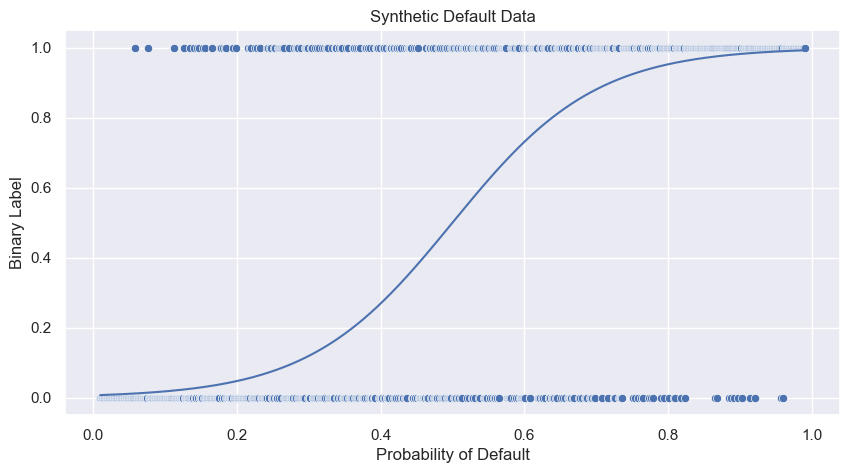

In [6]:
ax = sns.lineplot(
    x = x,
    y = y
)

ax.set(
    title = "Logistic Function"
)

sns.scatterplot(
    x = P,
    y = defaults
)

ax.set(
    title = "Synthetic Default Data",
    xlabel = "Probability of Default",
    ylabel = "Binary Label",
)

plt.show()

## <center> Optimization </center> 

## <center> Maximum Likelihood Estimation </center> 

## <center> $ \ell = \sum_{i=1}^{N} y_{k} \cdot ln(p_{k}) + (1 - y_{k}) \cdot ln(1 - p_{k}) $ </center> 

In [7]:
loss_func = 0

for i, p in enumerate(y):
    
    loss_func += defaults[i] * np.log(p) + (1 - defaults[i]) * np.log(1 - p)
    
print("Log Loss: ", loss_func / N)

Log Loss:  -0.5757778923394735


In [8]:
S = np.linspace(1/50, 1, N)
loss_func = np.zeros(N)

for i, s in enumerate(S):
    
    y = logistic_function(x, 0.5, s)
    summ = 0

    for j, p in enumerate(y):
        summ += defaults[j] * np.log(p) + (1 - defaults[j]) * np.log(1 - p)
        
    loss_func[i] = summ / N

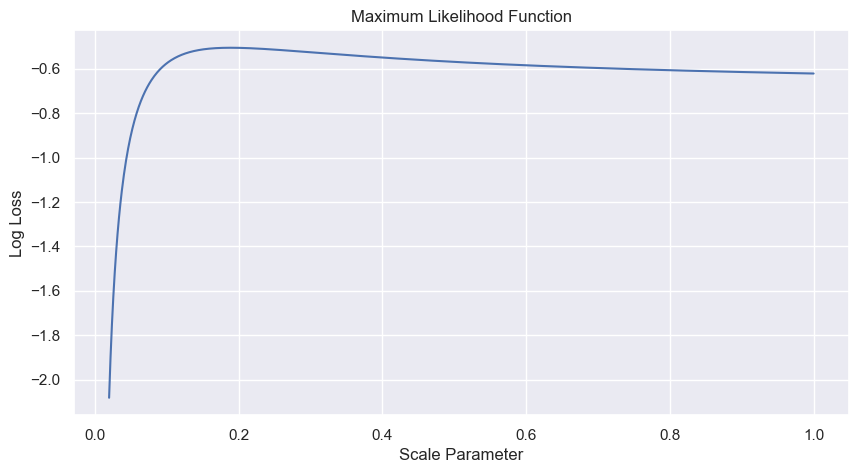

In [9]:
ax = sns.lineplot(
    x = S,
    y = loss_func
)

ax.set(
    title = "Maximum Likelihood Function",
    xlabel = "Scale Parameter",
    ylabel = "Log Loss"
)

plt.show()

## <center> Optimal Parameters </center> 

In [10]:
mu = 0.5
print("Optimal Location Parameter: ", mu)

Optimal Location Parameter:  0.5


In [11]:
s_hat = S[np.argmax(loss_func)]
print("Optimal Scaling Parameter: ", s_hat)

Optimal Scaling Parameter:  0.1887287287287287


In [12]:
beta0 = -mu / s_hat
print("Beta 0: ", beta0)

Beta 0:  -2.6493051872281748


In [13]:
beta1 = 1 / s_hat
print("Beta 1: ", beta1)

Beta 1:  5.2986103744563495


## <center> Gradients </center>  

## <center> $ \frac{\partial \ell}{\partial \beta_{0}} = \sum_{i=1}^{K} (y_{k} - p_{k}) $ </center> 

In [14]:
partial0 = 0

for i, p in enumerate(y):
    
    partial0 += defaults[i] - p
    
print("Derivative: ", partial0 / N)

Derivative:  0.010999999999999982


In [15]:
S = np.linspace(1/50, 1, N)
gradient = np.zeros(N)

for i, s in enumerate(S):
    
    y = logistic_function(x, 0.5, s)
    summ = 0

    for j, p in enumerate(y):
        summ += defaults[j] - p
        
    gradient[i] = summ / N

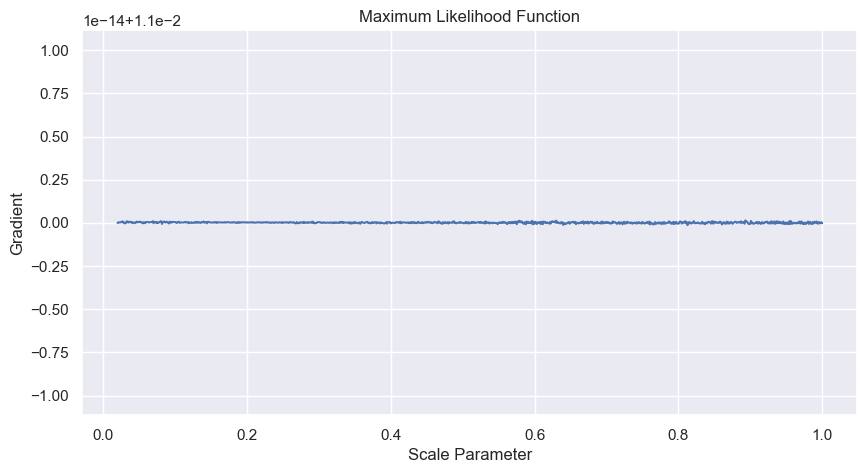

In [16]:
ax = sns.lineplot(
    x = S,
    y = gradient
)

ax.set(
    title = "Maximum Likelihood Function",
    xlabel = "Scale Parameter",
    ylabel = "Gradient"
)

plt.show()

## <center> $ \frac{\partial \ell}{\partial \beta_{1}} = \sum_{i=1}^{K} (y_{k} - p_{k}) \cdot x_{k} $ </center>

In [17]:
partial1 = 0

for i, p in enumerate(y):
    
    partial1 += (defaults[i] - p) * x[i]
    
print("Derivative: ", partial1 / N)

Derivative:  0.06735095737064091


In [18]:
S = np.linspace(1/50, 1, N)
gradient = np.zeros(N)

for i, s in enumerate(S):
    
    y = logistic_function(x, 0.5, s)
    summ = 0

    for j, p in enumerate(y):
        summ += (defaults[j] - p) * x[j]
        
    gradient[i] = summ / N

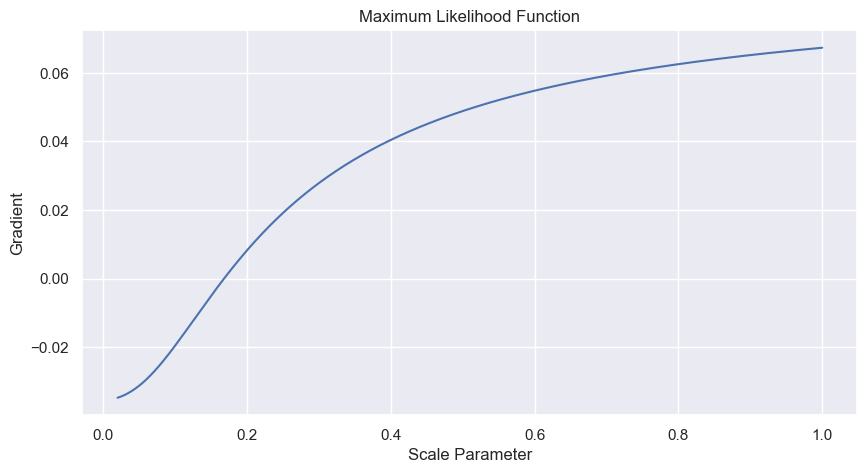

In [19]:
ax = sns.lineplot(
    x = S,
    y = gradient
)

ax.set(
    title = "Maximum Likelihood Function",
    xlabel = "Scale Parameter",
    ylabel = "Gradient"
)

plt.show()

## <center> ROC </center> 